In [1]:
import blitzgsea as blitz
import pandas as pd
import numpy as np

### Young vs old muscle example from blitzGSEA

In [2]:
# read signature as pandas dataframe
signature = pd.read_csv("https://github.com/MaayanLab/blitzgsea/raw/main/testing/ageing_muscle_gtex.tsv")

In [3]:
# list available gene set libraries in Enrichr
blitz.enrichr.print_libraries()

{'LIBRARY_LIST_URL': 'https://maayanlab.cloud/speedrichr/api/listlibs', 'LIBRARY_DOWNLOAD_URL': 'https://maayanlab.cloud/Enrichr/geneSetLibrary?mode=text&libraryName='}
0 - GeneSigDB
1 - Enrichr_Submissions_TF-Gene_Coocurrence
2 - SysMyo_Muscle_Gene_Sets
3 - WikiPathway_2021_Human
4 - HomoloGene
5 - WikiPathways_2013
6 - PFOCR_Pathways_2023
7 - serine_threonine_kinome_atlas_2023
8 - OMIM_Disease
9 - Data_Acquisition_Method_Most_Popular_Genes
10 - Cancer_Cell_Line_Encyclopedia
11 - WikiPathways_2016
12 - WikiPathways_2015
13 - RNAseq_Automatic_GEO_Signatures_Human_Up
14 - Human_Gene_Atlas
15 - KOMP2_Mouse_Phenotypes_2022
16 - MoTrPAC_2023
17 - Kinase_Perturbations_from_GEO_down
18 - Disease_Signatures_from_GEO_down_2014
19 - Disease_Perturbations_from_GEO_up
20 - Old_CMAP_down
21 - MCF7_Perturbations_from_GEO_up
22 - NIH_Funded_PIs_2017_GeneRIF_ARCHS4_Predictions
23 - PPI_Hub_Proteins
24 - DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
25 - Disease_Signatures_from_GEO_up_2014
26 - GTEx_

In [4]:
# use enrichr submodule to retrieve gene set library
library = blitz.enrichr.get_library("KEGG_2021_Human")

# run enrichment analysis
# Note: np.random.seed(), seed parameter and signature_cache=False
# seem to be required for reproducible results.
np.random.seed(123)
result = blitz.gsea(signature, library,  seed=123, signature_cache=False, processes=9, progress=True)

Calibration: 100%|██████████| 24/24 [00:16<00:00,  1.49it/s]


In [5]:
result[result['fdr'] < 0.01]

,es,nes,pval,sidak,fdr,geneset_size,leading_edge
Term,,,,,,,
Cell adhesion molecules,0.589422,7.193696,6.306067e-13,1.986411e-10,1.986411e-10,102,"PDCD1LG2,CLDN9,CD226,NLGN2,HLA-DPB1,CD99,VCAN,..."
Protein processing in endoplasmic reticulum,-0.441703,-6.089448,1.133008e-09,3.568976e-07,1.647447e-07,160,"HSPH1,UBXN8,SEC24A,SEC61A1,AMFR,UBQLN4,RNF5,MA..."
ECM-receptor interaction,0.614263,6.037109,1.568998e-09,4.942341e-07,1.647447e-07,71,"ITGA10,HSPG2,ITGA3,FREM2,COL4A4,AGRN,COL6A3,NP..."
Staphylococcus aureus infection,0.663913,5.535135,3.109887e-08,9.796097e-06,2.449036e-06,49,"HLA-DPB1,CFI,C3,C4A,CFB,HLA-DQA1,HLA-DRB1,HLA-..."
Complement and coagulation cascades,0.598652,5.379783,7.457584e-08,2.349111e-05,4.698278e-06,53,"C4A,VWF,C4B,C7,C6,A2M,CFB,CFD,C2,C1S,PLAT,CLU,..."
Calcium signaling pathway,0.384101,5.211790,1.870273e-07,5.891187e-05,9.818933e-06,173,"FGF7,AGTR1,MST1,TPCN2,PLCE1,CAMK2A,GRIN2C,VEGF..."
Protein digestion and absorption,0.543461,5.149458,2.612403e-07,8.228731e-05,1.175581e-05,70,"ELN,COL24A1,SLC9A3,COL8A1,ATP1A2,PRCP,COL4A4,C..."
Spinocerebellar ataxia,-0.437877,-5.091859,3.545690e-07,1.116830e-04,1.396115e-05,122,"PSMA2,TBPL1,PSMD12,KCNC3,PSMC1,CYCS,SLC25A4,AD..."
Systemic lupus erythematosus,0.554975,4.966480,6.817891e-07,2.147406e-04,2.386262e-05,57,"C7,HLA-DPB1,C3,C4A,H3-3B,H3-3A,HLA-DQA1,HLA-DR..."


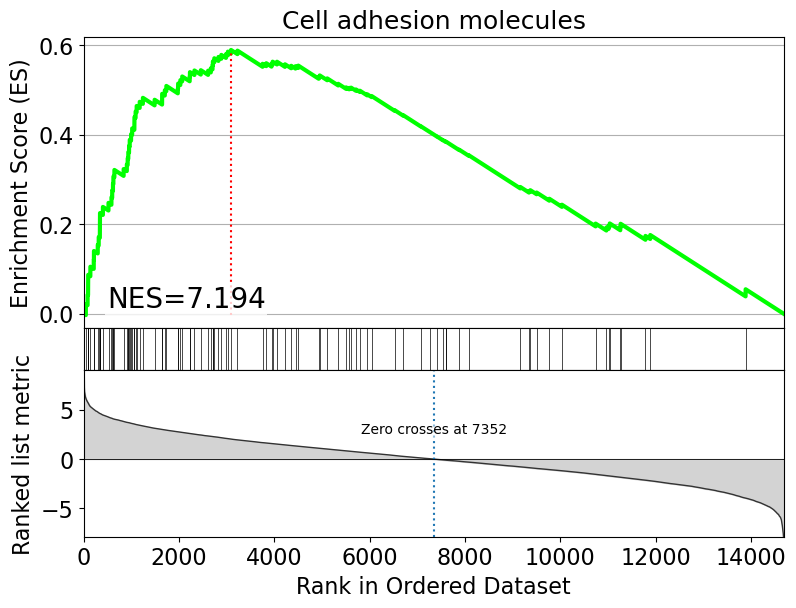

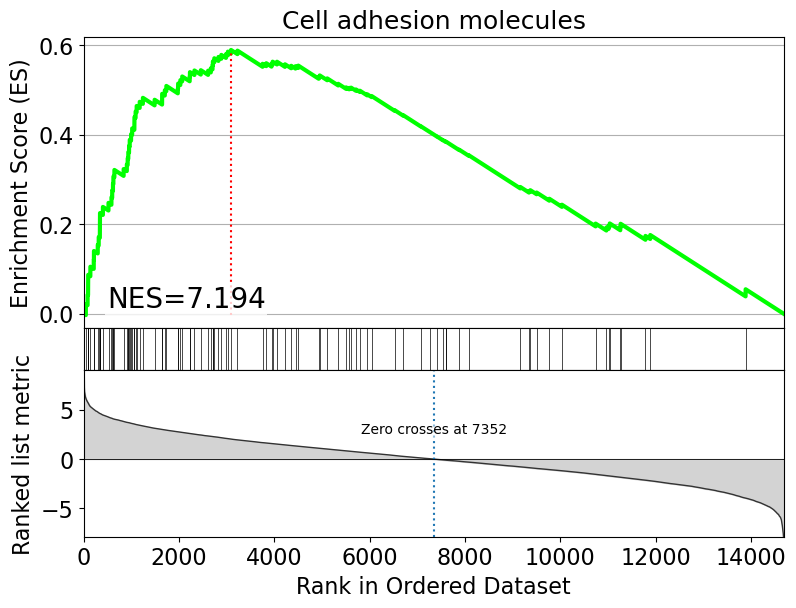

In [6]:
blitz.plot.running_sum(signature, "Cell adhesion molecules", library, result=result, compact=False)

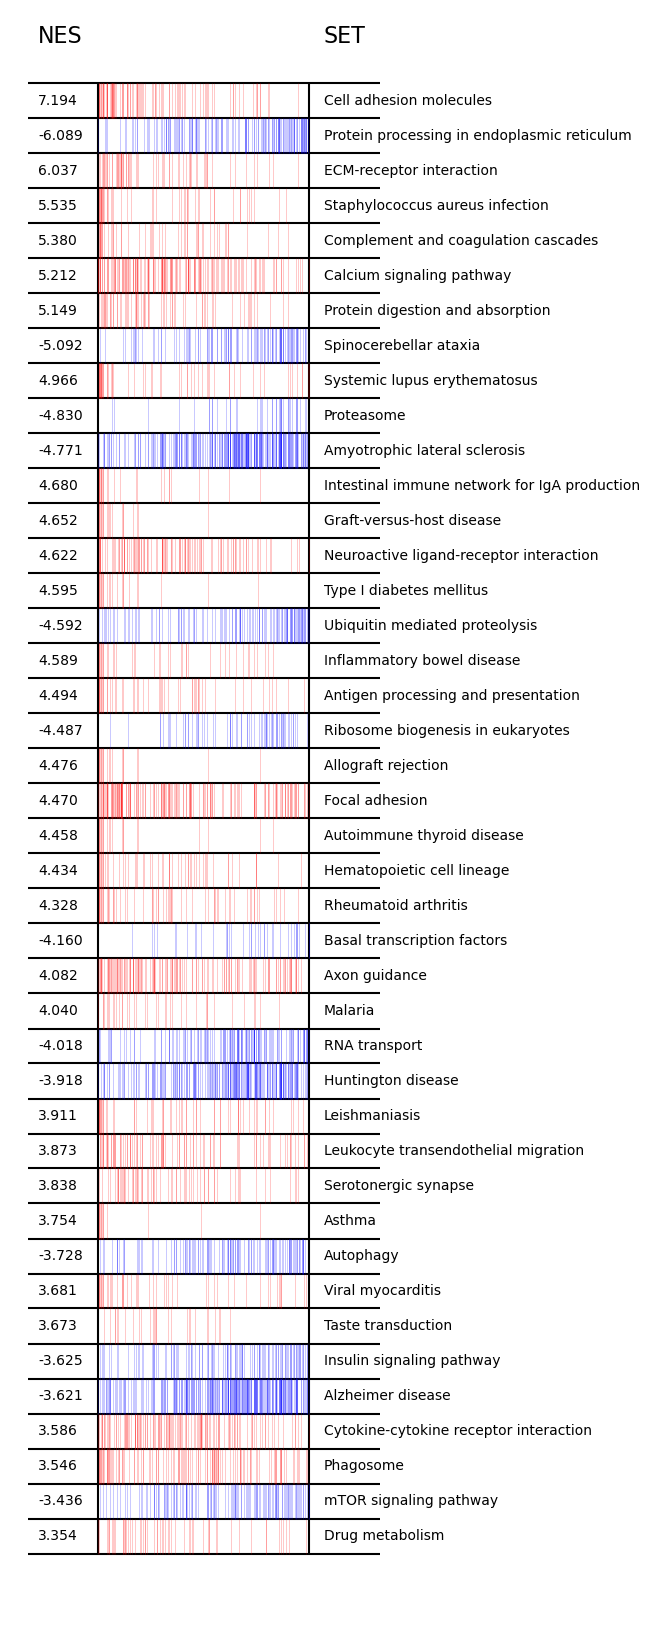

In [7]:
blitz.plot.top_table(signature, library, result, n=42, interactive_plot=False)